# Die Theorie der Quanteninformatik - Lineare Algebra kombiniert mit der Wahrscheinlichkeitstheorie über den Komplexen Zahlen
In diesem Kapitel sehen wir uns etwas genauer an, wie und wieso ein Quantencomputer einige Probleme viel schneller lösen kann.
Zuerst wird das Quibit erläutert. Dann eine Schaltung bis hin zu den verschiedenen Gates, wobei wir das Hadamard Gate genauer anschauen.

## Das Zweizustandsystem
Das Wort Bit ist eine Wortkreuzung aus binary digit – englisch für „binäre Ziffer“. Die kleinstmögliche Unterscheidung, die ein digitaltechnisches System treffen kann, ist die zwischen zwei Möglichkeiten, in der Informatik auch als Zustände bezeichnet. 
Zum Beispiel kann ein Lichtschalter Ein oder Aus sein was ein Bit und somit einen Zustand repräsentiert. Somit sind mit $einem$ Bit $zwei$, mit $zwei$ Bit $vier$ und mit $n$ Bit $2^n$ Zustände möglich. 

In der digitalen Schaltungstechnik werden Transistoren (BILD und von QBit transistor einheit) zum Steuern elektrischer Spannungen und Ströme verwendet. Liegt die Spannung im hohen Bereich, so liegt der Zustand H (high) vor, im unteren Bereich L (low).
Notiert wird der Zustand eines Bits als
- boolesche Variablen mit "wahr" bzw. "falsch"
- Binärstelle einer numerischen Variablen mit "0" bzw. "1"

Somit kann z.B. mit H-->1 und L-->0 eine Zuordnung gemacht werden.

Analog zum klassichen Bit gibt es in der Quanteninformation ebenfalls eine kleinste Einheit, das Qubit. Als Zweizustands-Quantensystem ist das Qubit das einfachste nichttriviale Quantensystem überhaupt. Der Begriff „Zweizustandssystem“ bezieht sich hierbei nicht etwa auf die Zahl der Zustände, die das System annehmen kann. In der Tat kann jedes nichttriviale quantenmechanische System prinzipiell unendlich viele verschiedene Zustände annehmen. Allerdings kann im Allgemeinen der Zustand eines Quantensystems durch Messung nicht sicher bestimmt werden, sondern durch die Messung wird zufällig einer der möglichen Messwerte ausgewählt, wobei die Wahrscheinlichkeit jedes Messwertes durch den vor der Messung vorliegenden Zustand bestimmt wird. Da zudem die Messung den Zustand ändert, kann dieses Problem auch nicht durch mehrmaliges Messen am gleichen System umgangen werden.

Jedoch gibt es zu jeder Messung bestimmte Zustände, bei deren Vorliegen vor der Messung der Messwert mit absoluter Sicherheit vorausgesagt werden kann, die sogenannten Eigenzustände der Messung. Dabei gibt es zu jedem möglichen Ergebnis mindestens einen solchen Zustand. Die maximale Anzahl möglicher Messwerte erhält man dabei für Messungen, bei denen es jeweils nur genau einen Zustand gibt, der diesen Messwert sicher liefert. Darüber hinaus liegt nach jeder Messung ein zum erhaltenen Messwert zugehöriger Eigenzustand vor (Kollaps der Wellenfunktion); liegt jedoch bereits vor der Messung ein Eigenzustand der Messung vor, so wird dieser nicht verändert.

Zwei Zustände, die man durch Messung sicher unterscheiden kann, nennt man auch orthogonal zueinander. Die maximale Anzahl der möglichen Messwerte bei einer Messung, und somit auch die maximale Anzahl orthogonaler Zustände, ist eine Eigenschaft des Quantensystems. Beim Qubit als Zweizustandssystem kann man also durch Messung genau zwei verschiedene Zustände sicher unterscheiden. Will man demnach ein Qubit einfach als klassischen Speicher verwenden, so kann man darin genau ein klassisches Bit speichern. Allerdings liegen die Vorteile des Qubits gerade in der Existenz der anderen Zustände.

Ein Beispiel hierfür ist die Polarisation eines Photons. Die Polarisation übernimmt die gleiche Aufgabe wie die Spannungsunterschiede im normalen Computer. Die Polarisation von Licht gibt an, in welche Richtung Licht schwingt. Obwohl die Polarisation eigentlich eine Welleneigenschaft ist, kann sie auch für das einzelne Photon definiert werden, und alle Polarisationen sind auch für einzelne Photonen möglich. Es gibt sozusagen zwei „Ausgänge“, einen für parallel und einen für senkrecht polarisierte Photonen. Stellt man an beide Stellen einen Photon-Detektor, dann kann man so feststellen, ob das Photon parallel oder senkrecht zur optischen Achse polarisiert.
Photonen, die eine andere Polarisation aufweisen, kommen aber ebenfalls an diesen „Ausgängen“ heraus. An welchem „Ausgang“ ein solches Photon herauskommt, ist in diesem Fall jedoch nicht voraussagbar; nur die Wahrscheinlichkeit kann vorhergesagt werden.

Wie bei klassischen Bits können auch mehrere Qubits zusammengefasst werden, um größere Werte zu speichern. Ein n-Qubit-System hat dabei genau  $2^{n}$ zueinander orthogonale Zustände. Was dies bedeutet wird später erläutert. In $n$ Qubits lassen sich somit genau $n$ klassische Bits speichern.

## Das Klassiche Bit - Cbit
Um mit der Diraknotation ein wenig vertraut zu werden, können die klassischen Bits = Cbits in die "Kästchen" mit den Symbolen $|$ für bra und $\rangle$ für ket gepackt werden. Hat man die Gleichungen mit Cbits verstanden, so werden die Qbits keine grossen Schwierigkeiten bereiten. 

Um die Cbits einfacher zu handhaben, können wir die Zustände $0$ und $1$ in einem zweidimensionalen Vektorraum definieren mit $|0\rangle = |0\rangle_{1} = \left(\begin{array}{cc} 1\\ 0\end{array}\right)$ und $|1\rangle =|1\rangle_{1} = \left(\begin{array}{cc} 0\\ 1\end{array}\right)$. Die $1$ nach dem Ket Repräsentiert die Anzahl Cbits. Wir sehen, dass die Zahl $0$ nicht immer die gleiche Bedeutung hat:

$$\langle h|h \rangle = \left(\begin{array}{cc} 1 & 0\end{array}\right)* \left(\begin{array}{cc} 1\\ 0\end{array}\right) = 1$$

$$|h \rangle \langle h|= \left(\begin{array}{cc} 1\\ 0\end{array}\right) * \left(\begin{array}{cc} 1 & 0\end{array}\right) = \left(\begin{array}{cc} 1 & 0\\ 0 & 0\end{array}\right)$$

Das Cbit kann also in einem zweidimensionalen Vektorraum folgendermassen abgebildet werden:
![vecB2](src_picture\vecB2.png) (1.1)

Wir wissen, dass es mit drei Cbits acht mögliche Zustände gibt, welche unterschiedlich dargestellt werden können: 

$$ 0=|0\rangle_{3} = |000\rangle, 1=|1\rangle_{3} = |001\rangle, 2 =|2\rangle_{3}= |010\rangle, 3 =|3\rangle_{3}= |011\rangle, 4 =|4\rangle_{3}= |100\rangle, 5 =|5\rangle_{3}= |101\rangle, 6=|6\rangle_{3} = |110\rangle, 7=|7\rangle_{3} =|111\rangle \,\,\,\,\,\,\,\,(1.2)$$ 

was eine verkürtze Form des Tensorproduktes ist:

$$|0\rangle*|0\rangle*|0\rangle, \,\,|0\rangle*|0\rangle*|1\rangle, \,\,|0\rangle*|1\rangle*|0\rangle, \,\,|0\rangle*|1\rangle*|1\rangle, \,\,|1\rangle*|0\rangle*|0\rangle, \,\,|1\rangle*|0\rangle*|1\rangle, \,\,|1\rangle*|1\rangle*|0\rangle, \,\,|1\rangle*|1\rangle*|1\rangle\,\,\,\,\,\,\,\,(1.3)$$ 

Das ist insofern wichtig, da die Quantenmechanik verlangt, dass auch jede Überlagerung von Zuständen eines Objekts wieder ein möglicher Zustand des Objekts ist. Deshalb muss das mathematische Modell außer den genannten Produkten auch beliebige Linearkombinationen enthalten, die dann insgesamt den Hilbertraum des Systems bilden.

In userem Beispiel mit drei Cbits wäre der Vektorraum achtdimensional mit einer orthonormalen Basis.
Wir erstellen das Tensorprodukt der Cbits in der Form

$$\left(\begin{array}{cc} x_{0}\\ x_{1}\end{array}\right) \bigotimes
\left(\begin{array}{cc} y_{0}\\ y_{1}\end{array}\right) \bigotimes 
\left(\begin{array}{cc} z_{0}\\ z_{1}\end{array}\right) 
= \left(\begin{array}{cc}  x_{0}y_{0}z_{0}\\ x_{0}y_{0}z_{1}\\x_{0}y_{1}z_{0}\\x_{0}y_{1}z_{1}\\x_{1}y_{0}z_{0}\\x_{1}y_{0}z_{1}\\x_{1}y_{1}z_{0}\\x_{1}y_{1}z_{1}\\\end{array}\right)\,\,\,\,\,\,\,\,(1.4)$$

und erhalten zum Beispiel für $5_{d} = 101_{b} = |101\rangle = |1\rangle \bigotimes|0\rangle \bigotimes|1\rangle=$
$$\left(\begin{array}{cc} 0\\ 1\end{array}\right) \bigotimes
\left(\begin{array}{cc} 1\\ 0\end{array}\right) \bigotimes 
\left(\begin{array}{cc} 0\\ 1\end{array}\right) 
= \left(\begin{array}{cc}  0\\ 0\\0\\0\\0\\1\\0\\0\end{array}\right)\,\,\,\,\,\,\,\,(1.5)$$

Wenn wir nun diesen Vektor indexieren mit $0$ bis $n$, dann können wir dort wo der Index $true = 1$ ist den Wert ablesen, also $5$.

Sprich, man kann jeden Integer $x$ mit $0<=x<=N$ als linearkombination von $N$ orthonormalen Vektoren in einem $N$-dimensionalen Raum darstellen. Aus dem Tensorprodukt folgt dann, dass wenn $N=2^n$ und $x = \sum_{i=0}^{n-1} x_{i}2^{i}$ (S.8)


### Reversible Operationen auf Cbits
Quantencomputer brauchen fast ausschliesslich reversible Operationen um die Rechnungen auszuführen. Es gibt nur eine einzige irreversible Operation die gebraucht wird: die Messung. Sie wird gebraucht um den Zustand der Qbits nach den Transformationen auszulesen. Bei den Qbits ist die Messung ein komplexer Bestandteil, wohin er bei den Cbits als einfach erscheint und daher wird die Messung explizit auch nie gross erwähnt. Da nur reversible Operationen auf Qbits ausgeführt werden können, schauen wir uns auch nur reversible Operationen auf Cbits an.
Die Operation "Löschen" ist dagegen irreversibel, da der Output immer $|0\rangle$ ergibt ungeachtet ob nun der Input $|0\rangle$ oder $|1\rangle$ war.

Die Anzahl der reversieblen Operationen steigt mit der Anzahl der verfügbaren Cbits gewaltig. Basisoperationen sind dabei jegliche Permutation von $n$ Zuständen. Dabei gibt es mit $n$-Cbits $n!$ mögliche Transforamtionsmatrizen. Mit zwei Cbits haben wir also vier Zustände und $4! = 24$ mögliche Transforamtionsmatrizen.

#### Definition des NOT-Operator
Nach einer reversiblen Operation muss der Output eindeutig rüchwärts auf den Input zu schliessen sein.

$$f_{NOT}(|x\rangle): |x\rangle \to |\bar{x}\rangle$$
$$f_{NOT}(|1\rangle)= \bar{|1\rangle} = |0\rangle$$
$$f_{NOT}(|0\rangle)= \bar{|0\rangle} = |1\rangle \,\,\,\,\,\,\,\,(1.5)$$

Die NOT-Funktion, oder auch bekannt unter Pauli-X Gate, ist reversibel, da sie ein Inverses hat: führt man die NOT-Funktion zweimal hintereinander aus, dann erhält man den ursprünglichen Input. 

$$X^2=f_{NOT}(|1\rangle)^2 = f_{NOT}(f_{NOT}(|1\rangle)) = f_{NOT}(\bar{|1\rangle}) = f_{NOT}(|0\rangle) = \bar{|0\rangle} = |1\rangle\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,(1.6)$$


Ein "praktisches" Beispiel: Es sei Mitteilung $M =$ "Ich bin schwanger." und die Verneinungs-Funktion $f_{nein}()$ . Nun teilt einem die Freundin mit:
$$f_{nein}(M)^2=f_{nein}("Ich\,bin\,schwanger")^2=f_{nein}("Ich\,bin\,nicht\,schwanger")="Ich\,bin\,nicht\,unschwanger"="Ich\,bin\,schwanger"$$

Allgemein gilt
$$f_{NOT}()^{2^n} = 1 \,\,\,\,\,\,\,\,(1.7)$$
wobei die $1$ die Identitätsmatrix ist. 

Nicht nur die NOT-Operation, sondern jede beliebige auf C- und Qbits angewendete Operationen sind im Grunde nichts weiter als Matrixmultiplikationen. 
Wenn wir nun die orthogonalen Zustände unserer Cbits mithilfe von Vektoren (verlinkung nach oben) darstellen wollen, dann kann man die NOT-Operation folgendermassen tun:
$$X = \left(\begin{array}{cc} 0& \dots &1\\ \vdots& 1 &\vdots\\1& \dots &0\\\end{array}\right) \,\,\,\,\,\,\,\,(1.8)$$
Wenn wir nun $X$ auf einen Zustand anwenden, dann ergbit es das Komplement. Wenden wir jedoch $2^n$-mal $X$ an, dann entsteht die Indentitätsmatrix, was identisch mit der Multiplikation von $1$ ist:
$$1=\left(\begin{array}{cc} 1& \dots &0\\ \vdots& 1 &\vdots\\0& \dots &1\\\end{array}\right) \,\,\,\,\,\,\,\,(1.9)$$

$X$ und $1$ sind die einzigen zwei reversiblen Operationen auf ein __einzelnes__ Cbit.

#### Anwendung des NOT-Operator
Wenn wir $X$ auf ein Cbit mit dem Zustand $|0\rangle$ anwenden um $|1\rangle$ zu erhalten, dann multiplizieren wir zwei Matrizen miteinander. Reminder: Matrizenmultipliktaion ist nicht kommutativ.
$$f_{NOT}(|0\rangle) = X*|0\rangle \,\,\,\,\,\,\,\,(1.10)$$

$$= \left(\begin{array}{cc} 0 & 1\\ 1 & 0\end{array}\right) *\left(\begin{array}{cc} 1\\ 0\end{array}\right) = \left(\begin{array}{cc} 0\\ 1\end{array}\right) = |1\rangle \,\,\,\,\,\,\,\,(1.11)$$
Nun kann man durch erneutes anwenden von $X$ wieder eindeutig vom Output zum Input gelangen:
$$f_{NOT}(|1\rangle) = \left(\begin{array}{cc} 0 & 1\\ 1 & 0\end{array}\right) *\left(\begin{array}{cc} 0\\ 1\end{array}\right) = \left(\begin{array}{cc} 1\\ 0\end{array}\right) = |0\rangle \,\,\,\,\,\,\,\,(1.12)$$

Das gleiche gilt für zwei bzw. $n$-Cbits. Wir wollen nun die NOT-Operation auf den Zustand $|10\rangle = 2_{d}$ anwenden. Als Ergebnis erwarten wir den Zustand $|01\rangle = 1_{d}$

$$f_{NOT}(|10\rangle) = \left(\begin{array}{cc} 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\\0 & 1 & 0 &0\\1 & 0 & 0 &0\\\end{array}\right) *\left(\begin{array}{cc} 0\\ 0\\ 1\\ 0\end{array}\right) = \left(\begin{array}{cc} 0\\1\\ 0\\ 0\end{array}\right) = |01\rangle \,\,\,\,\,\,\,\,(1.13)$$

Um eine gewisse Vorstellung von den Dimensionsgrössen aufzubauen, hier noch ein Beispiel mit drei Cbits. Wir geben eine $5_{d}$ ein und erwarten eine $2_{d}$:

$$f_{NOT}(|101\rangle) = \left(\begin{array}{cc} 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\\end{array}\right) *\left(\begin{array}{cc} 0\\0\\0\\0\\0\\ 1\\ 0\\ 0\end{array}\right) = \left(\begin{array}{cc} 0\\0\\1\\ 0\\ 0\\ 0\\ 0\\ 0\end{array}\right) = |010\rangle \,\,\,\,\,\,\,\,(1.14)$$


#### Definition des SWAP-Operator
Die SWAP-Operation vertauscht wie es der Name schon sagt die Zustände der Cbits $i$ und $j$ miteinander:

$$f_{SWAP_{ij}}(|xy\rangle)=|yx\rangle \,\,\,\,\,\,\,\,(1.15)$$


#### Anwendung des SWAP-Operator
Wenden wir nun die SWAP-Operation $f_{SWAP_{10}}(|10\rangle)$ an, dann vertauschen wir die zweite mit der dritten Zeile des Vektors. Dabei stehen $i$ und $j$ für die Zustände, welche als Input den Cbits mitgegeben werden, deshalb sind die Matrizen $S_{10}$ und $S_{01}$ identisch:

$$f_{SWAP_{10}}(|10\rangle) = f_{SWAP_{01}}(|10\rangle) = S_{10}*|10\rangle = S_{01}*|10\rangle$$

$$= \left(\begin{array}{cc} 1&0&0&0\\0&0&1&0\\0&1&0&0\\0&0&0&1\end{array}\right)*\left(\begin{array}{cc} 0\\0\\1\\0\end{array}\right)=\left(\begin{array}{cc} 0\\1\\0\\0\end{array}\right)=|01\rangle  \,\,\,\,\,\,\,\,(1.16)$$

#### Definition des cNOT-Operator
Die controlled-NOT-Operation $f_{cNOT_{ij}}$ spielt eine zentrale Rolle in de Quanteninformatik. Wenn der Zustand des $i$-ten Cbit (das control Bit) $|0\rangle$ ist, dann bleibt das $j$-te Cbit (das target Bit) unverändert. Hingegen ist das control Bit $|1\rangle$, dann wird auf das target Bit die NOT-Funktion $f_{NOT}$ ausgeführt:

$f_{cNOT_{10}}(|x\rangle|y\rangle) = |x\rangle|y\bigoplus x\rangle  \,\,\,\,\,\,\,\,(1.17)$

$f_{cNOT_{01}}(|x\rangle|y\rangle) = |x\bigoplus y\rangle|y\rangle  \,\,\,\,\,\,\,\,(1.18)$

wobei $\bigoplus$ die Addition des Modulos 2 bedeutet:

$y\bigoplus 0=y  \,\,\,\,\,\,\,\,(1.19)$

$y\bigoplus 1=\bar{y}=1-y  \,\,\,\,\,\,\,\,(1.20)$

Die Modulo-2-Summe $x\bigoplus y$ oder besser bekannt als XOR Funktion (exclusive OR).

#### Anwendung des cNOT-Operator
Wenn wir nun z.B. die $C$-Matrix für $f_{cNOT_{ij}}$ im vierdimensionalen 2-Cbit Raum konstruieren wollen, dann gibt es zwei Mögliche Matrizen:
- Wenn das erste Cbit das Conrol Bit ist: $|00\rangle$ und $|01\rangle$ bleiben konstant, $|10\rangle$ wechselt mit $|11\rangle$
$$C_{10}= \left(\begin{array}{cc} 1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{array}\right) \,\,\,\,\,\,\,\,(1.21)$$

- Wenn das zweite Cbit das Control Bit ist: $|00\rangle$ und $|10\rangle$ bleiben konstant, $|01\rangle$ wechselt mit $|11\rangle$
$$C_{01}= \left(\begin{array}{cc} 1&0&0&0\\0&0&0&1\\0&0&1&0\\0&1&0&0\end{array}\right) \,\,\,\,\,\,\,\,(1.22)$$

Wir können unsere $S$-Matrize von der SWAP-Funktion aus der Multiplikation der drei $C$-Matrizen bilden:
$$f_{SWAP_{ij}}=f_{cNOT_{ij}}*f_{cNOT_{ji}}*f_{cNOT_{ij}}$$
$$=S_{ij}=C_{ij}*C_{ji}*C_{ij} \,\,\,\,\,\,\,\,(1.23)$$

#### Definition des n-Operator
Operatoren wie SWAP und cNOT lassen sich anhand zwei grundlegenden Operatoren ausdrücken: $n$ und $X$. Den NOT-Operator kennen wir bereits.
Die Definition für den $n$-Operator lautet:
$$n|x\rangle = x|x\rangle \,\,\,\,\,\,\,\,(1.24)$$
$$mit \, x = 0 \, oder \, 1$$
Und das Komplement:
$$\bar{n} = 1-n \,\,\,\,\,\,\,\,(1.25)$$
daraus folgt per Definition:
$$n^2 = n \,\,\,\,\,\,\,\,\,\,\,\,,\,\,\,\, n^m =n \,\,m element in N \,\,\,\,\,\,\,\,(1.26)$$
$$n*\bar{n}=\bar{n}*n=0 \,\,\,\,\,\,\,\,(1.27)$$
$$n+\bar{n}=\bar{n}+n=1\,\,\,\,\,\,\,\,(1.28)$$

und hat als $2x2$-Matrix die Form:
$$n =  \left(\begin{array}{cc} 0&0\\0&1\end{array}\right), \,\,\,\,\,\,\,\, \bar{n}= \left(\begin{array}{cc} 1&0\\0&0\end{array}\right)$$

Ausserdem gilt auch für unsere bekannte $X$ Matrix von der $f_{NOT}()$:
$$n*X=X*\bar{n} \,\,\,\,\,\,\,\,(1.29)$$
$$\bar{n}*X=X*n\,\,\,\,\,\,\,\,(1.30)$$

Der $n$-Operator wird anhand einem Beispiel leicht verständlich.
Vorneweg sei gesagt, dass $f_{n}()$ keine direkten physikalischen Operationen auf Cbits ausführen! Sie sind rein mathematische Konstrukte. Sie kann jedoch sehr hilfreich sein, um die physikalischen Zusammenhänge zwischen den Funktionen zu verstehen. 

#### Anwendung des n-Operator
Die Matrix $S_{ij}$ (SWAP-Operator) , die wir in 1.23 mit $C_{ij}$ (cNOT-Operator) ausgedrückt haben und  $C_{ij}$ selbst können mit $n$ und $X$ (NOT-Operation) ausgedrückt werden (Herleitung Quantum Computer Science - An Introduction - N. Mermin (Cambridge, 2007) WW (3) Seite 12-17).

Für $C_{ij}$ gilt:
$$C_{ij}=\bar{n_{i}}+X_{j}*n_{i} \,\,\,\,\,\,\,\,(1.31)$$

Wir wissen aus 1.23, dass man die $S$-Matrize aus der Multiplikation der drei $C$-Matrizen bilden kann:
$$S_{ij}=C_{ij}*C_{ji}*C_{ij}$$

somit
$$S_{ij}=\bar{n_{i}}+X_{j}*n_{i}*\bar{n_{j}}+X_{i}*n_{j}*\bar{n_{i}}+X_{j}*n_{i} $$
$$S_{ij}=n_{i}*n_{j}+\bar{n_{i}}*\bar{n_{j}}+(X_{i}*X_{j})*(n_{i}*\bar{n_{j}}+\bar{n_{i}}*n_{j})\,\,\,\,\,\,\,\,(1.32)$$

Anhand eines Beispiel werden diese Gleichungen verständlicher. Wir nehmen zwei Cbits und wollen nun $C_{10}$ berechnen. Wir wissen aus (1.21), dass unsere Matrix folgende Form haben muss:
$$C_{10}= \left(\begin{array}{cc} 1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{array}\right) $$

Als erstes Definieren wir die Vektoren. Mit zwei Cbits erhalten wir $2^2$ Vektoren, je einen Vektor pro Zustand:
$$|00\rangle=|0\rangle_{2} = \left(\begin{array}{cc} 1\\0\\0\\0\end{array}\right), \, |01\rangle=|1\rangle_{2} = \left(\begin{array}{cc} 0\\1\\0\\0\end{array}\right), \,|10\rangle=|2\rangle_{2} = \left(\begin{array}{cc} 0\\0\\1\\0\end{array}\right), \,|11\rangle=|3\rangle_{2} = \left(\begin{array}{cc} 0\\0\\0\\1\end{array}\right), \,  \,\,\,\,\,\,\,\,(1.34)$$

Damit können wir die $n_{i}$ für jeden Vektor definieren. Wir erhalten zwei $n$-Matrizen, $n_{0}$ für das erste Cbit und $n_{1}$ für das zweite Cbit:

$$n_{0}|00\rangle = 0|00\rangle, \, n_{0}|01\rangle = 1|01\rangle, \,n_{0}|10\rangle = 0|10\rangle, \,n_{0}|11\rangle = 1|11\rangle  \,\,\,\,\,\,\,\,(1.35)$$

Daraus folgt die Matrix:
$$n_{0} = \left(\begin{array}{cc} 0&0&0&0\\0&1&0&0\\0&0&0&0\\0&0&0&1\end{array}\right)  \,\,\,\,\,\,\,\,(1.36)$$

und

$$n_{1}|00\rangle = 0|00\rangle, \, n_{1}|01\rangle = 0|01\rangle, \,n_{1}|10\rangle = 1|10\rangle, \,n_{1}|11\rangle = 1|11\rangle  \,\,\,\,\,\,\,\,(1.37)$$

Daraus folgt die Matrix:
$$n_{1} = \left(\begin{array}{cc} 0&0&0&0\\0&0&0&0\\0&0&1&0\\0&0&0&1\end{array}\right)  \,\,\,\,\,\,\,\,(1.38)$$

Wir sehen hier schön, dass z.B. $n_{0}$ den Vektor weitergibt, wenn das erste Cbit = $1$ ist und sonst nicht, da er mit $0$ multipliziert wird. Damit ergeben sich mit zwei Cbits zwei halbwegs volle Einheitsmatrizen.

Nun definieren wir die NOT-Operatoren $X_{j}$:

$$X_{0}|00\rangle = |01\rangle, \, X_{0}|01\rangle = |00\rangle, \,X_{0}|10\rangle = |11\rangle, \,X_{0}|11\rangle = |10\rangle  \,\,\,\,\,\,\,\,(1.39)$$

Daraus folgt die Matrix:
$$X_{0} = \left(\begin{array}{cc} 0&1&0&0\\1&0&0&0\\0&0&0&1\\0&0&1&0\end{array}\right)  \,\,\,\,\,\,\,\,(1.40)$$

und 

$$X_{1}|00\rangle = |10\rangle, \, X_{1}|01\rangle = |11\rangle, \,X_{1}|10\rangle = |00\rangle, \,X_{1}|11\rangle = |01\rangle  \,\,\,\,\,\,\,\,(1.41)$$

Daraus folgt die Matrix:
$$X_{1} = \left(\begin{array}{cc} 0&0&1&0\\0&0&0&1\\1&0&0&0\\0&1&0&0\end{array}\right) \,\,\,\,\,\,\,\,(1.42)$$

Damit können wir nun $C_{ij}$ ausdrücken:

$$C_{ij}=\bar{n_{i}}+X_{j}*n_{i}$$
$$C_{10} = \bar{n_{1}}+X_{0}*n_{1}$$
$$C_{10} = 1 - {n_{1}}+X_{0}*n_{1}$$

$$C_{10} = \left(\begin{array}{cc} 1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&1\end{array}\right) - \left(\begin{array}{cc} 0&0&0&0\\0&0&0&0\\0&0&1&0\\0&0&0&1\end{array}\right) + \left(\begin{array}{cc} 0&1&0&0\\1&0&0&0\\0&0&0&1\\0&0&1&0\end{array}\right) * \left(\begin{array}{cc} 0&0&0&0\\0&0&0&0\\0&0&1&0\\0&0&0&1\end{array}\right) $$

$$C_{10} = \left(\begin{array}{cc} 1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{array}\right)$$

#### Definition des Z-Operator
Ein weiterer wichtige Funktion ist $f_{Z}()$ / Pauli-Z Gate.
Die  $Z$-Matrix hat die Form:

$$Z = \bar{n} - n = \left(\begin{array}{cc} 1&0\\0&-1\end{array}\right) \,\,\,\,\,\,\,\,(1.43)$$

und interagiert mit $X$:

$$ZX = -XZ \,\,\,\,\,\,\,\,(1.44)$$

und 

$$Z^2 = 1 \,\,\,\,\,\,\,\,(1.45)$$

Aus 1.28 wissen wir, dass $\bar{n}+n=1$ und können so die $n$-Operatoren durch $Z$ ausdrücken:

$$\bar{n}=1-n, \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, n = 1-\bar{n}$$
$$Z+n = 1-n, \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \bar{n}-Z=1-\bar{n}$$
$$n+n=2*n = 1-Z, \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \bar{n}+\bar{n}=2*\bar{n} = 1+Z$$
$$n = \frac{1}{2}*(1-Z), \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \bar{n}=\frac{1}{2}*(1+Z)$$
$$\,\,\,\,\,\,\,(1.46)$$

Auch hier können wir wieder unsere $C_{ij}$ -Matrix aus 1.31 nehmen:

$$C_{ij}=\bar{n_{i}}+X_{j}*n_{i}$$

und setzen für $n$ bzw. $\bar{n}$ die Gleichung aus (1.46) ein:

$$C_{ij}= \frac{1}{2}*(1+Z_{i}) + X_{j}*\frac{1}{2}*(1-Z_{i})$$

$$C_{ij}= \frac{1}{2}*(1+X_{j}) + Z_{i}*\frac{1}{2}*(1-X_{j}) \,\,\,\,\,\,\,\,(1.47)$$

Wir können $Z_{i}$ mit $X_{j}$ ersetzen und umgekehrt, für $i\neq j$. Wenn wir also $X$ und $Z$ ändern, dann ändern wir auch das Control Bit und das Target Bit, also im Beispiel von $C_{ij}$ zu $C_{ji}$. Und nun kommen wir zu dem berühmten Operator, der genau diese Funktion liefert: Die Hadamard-Transformation $H$.

#### Definition des H-Operator
Der Hadamard-Operator $H$ ist ebenfalls ein fundamentaler Operator und wird vorallem beim Grover-Algorithmus eine zentrale Rolle einnehmen. Er wird aus einer $ 2^{m} \times 2^{m}$-Hadamard-Matrix gebildet und anschliessend noch skaliert mit einem Normalisierungsfaktor. Der Normalisierungsfaktor ist wichtig, da die Summe eines Vektors vor und nach der $H$-Operation $= 1$ sein müssen.

Die Definition der Indentiät lautet:

$$H_{0} = 1 \,\,\,\,\,\,\,\,(1.48)$$

Daraus lassen sich rekursiv $H_{m}$ für $m>0$ bestimmen: 

$$H_{m} = \frac{1}{\sqrt{2}^m}* \left(\begin{array}{cc} H_{m-1} & H_{m-1}\\H_{m-1} & -H_{m-1}\end{array}\right) \,\,\,\,\,\,\,\,(1.49)$$

#### Anwendung des H-Operator
Wir wollen nun für ein Cbit die $H_{1} = 2^{1} \times 2^{1}$-Matrix bestimmen. Dabei sehen wir, dass sich $H$ aus $X$ und $Z$ erzeugen lässt:

$$H_{1} = \frac{1}{\sqrt{2}^1}* \left(\begin{array}{cc}H_{0} & H_{0}\\H_{0} & -H_{0} \end{array}\right) = \frac{1}{\sqrt{2}}*\left(\begin{array}{cc} 1&1\\1&-1\end{array}\right)=\frac{1}{\sqrt{2}}*(X+Z) \,\,\,\,\,\,\,\,(1.50)$$

Rekursiv könnnen wir nun für zwei Cbits die $H_{2} = 2^{2} \times 2^{2}$-Matrix bestimmen:

$$H_{2} = \frac{1}{\sqrt{2}^2}* \left(\begin{array}{cc} H_{1} & H_{1}\\H_{1} & -H_{1}\end{array}\right) = \frac{1}{2}* \left(\begin{array}{cc} 1&1&1&1\\1&-1&1&-1\\1&1&-1&-1\\1&-1&-1&1\end{array}\right) \,\,\,\,\,\,\,\,(1.51)$$

Zudem gilt:
$$H^2 = 1  \,\,\,\,\,\,\,\,(1.52)$$ 

$$H*X*H = Z, \,\,\,\,\,\,\,\, H*Z*H = X \,\,\,\,\,\,\,\,(1.53)$$

Auch die $C_{ij}$- Matrix lässt sich anhand $H$ ausdrücken:

$$C_{ji} = (H_{i}*H_{j})*C_{ij}*(H_{i}*H_{j}) \,\,\,\,\,\,\,\,(1.54)$$

## Das Quantenbit - Qbit
Der Zustand eines Cbit ist zwar ein ziemlich primitives Beispiel eines zweidimensionalen Vektors, jedoch haben mir die Gedankengänge des Cbits enorm geholfen um das Qbit besser zu verstehen. Vektoren können zwar theoretisch beliebige Winkel einnehmen, doch die einzigen brauchbaren Vektoren mit irgendeiner klassischen Bedeutung im gesamten Vektorraum sind die zwei orthonormalen Vektoren $|0\rangle $ und $|1\rangle$. Das sind die einzigen zwei erlaubten Zustände, die ein Cbit haben kann. Wie langweilig! Zum guten Glück stellt uns die Natur Quantensysteme zur Verfügung. Wir nennen sie Qbits, erweiterte Cbits ohne Einschränkungen bezüglich Winkel der Vektoren. genauer beschreiben mit wert ist 0 und 1 mit wsk

### Definition des Qbits
Der Zustand eines Qbits dargestellt durch $|\psi\rangle$ kann jeden beliebigen Vektor im zweidimensionalen Vektorraum aufgespannt durch $|0\rangle $ und $|1\rangle$ über den komplexen Zahlen einnehmen. 

Zur Beschreibung eines Qubits nimmt man eine beliebige Messgröße (z. B. im Beispiel mit den Photonen die Polarisation parallel und senkrecht zur optischen Achse eines doppelbrechenden Kristalls) und nennt die zugehörigen Eigenzustände $|0\rangle $ und $|1\rangle$.

Somit kann ein Qbit geschriben werden als

$$|\psi\rangle = \alpha_{0}*|0\rangle +  \alpha_{1}*|1\rangle = \left(\begin{array}{c} \alpha_{0} \\ \alpha_{1} \end{array}\right) \,\,\,\,\,\,\,\,(3.1)$$

Dabei sind $\alpha_{0}$ und $\alpha_{1}$ komplexe Zahlen mit der einzigen Vorraussetzung, dass $|\psi\rangle$ ein Einheitsvektor im komplexen Vektorraum sein sollte, sprich es soll gelten, dass

$$|\alpha_{0}|^2 + |\alpha_{1}|^2 = 1. \,\,\,\,\,\,\,\,(3.2)$$

Der Zustand $|\psi\rangle$ ist eine Superposition von den Zuständen $|0\rangle $ und $|1\rangle$ mit den Amplituden $\alpha_{0}$ und $\alpha_{1}$. 

Qbits sind im Vergleich zu den Cbits nur eine Abstraktion,  die benutzt wird, um die Zustände zu beschreiben. Die Natur rechnet nicht mit Matrizen noch kennt sie reversible Operationen. Sie ist einfach so. Wir beschreiben die Natur mithilfe Heisenberg und Co. und hoffen sie somit besser zu verstehen.

#### Die Bloch-Kugel?


Nun kann nach gleichem Schema den Zustand für zwei Qbits konstruieren:

$$|\Psi\rangle = \alpha_{00}*|00\rangle +  \alpha_{01}*|01\rangle +\alpha_{10}*|10\rangle +  \alpha_{11}*|11\rangle = \alpha_{00}*\left(\begin{array}{cccc} 1 \\ 0 \\ 0 \\ 0 \end{array}\right) +  \alpha_{01}*\left(\begin{array}{cccc} 0 \\ 1 \\ 0 \\ 0 \end{array}\right) + \alpha_{10}*\left(\begin{array}{cccc} 0 \\ 0 \\ 1 \\ 0 \end{array}\right) +  \alpha_{11}*\left(\begin{array}{cccc} 0 \\ 0 \\ 0 \\ 1 \end{array}\right) = \left(\begin{array}{cccc} \alpha_{00} \\ \alpha_{01} \\ \alpha_{10} \\ \alpha_{11} \end{array}\right) \,\,\,\,\,\,\,\,(3.3)$$

Auch hier gilt wieder:

$$|\alpha_{00}|^2 + |\alpha_{01}|^2 + |\alpha_{10}|^2 + |\alpha_{11}|^2= 1. \,\,\,\,\,\,\,\,(3.4)$$

Allgemein für $n$-Qbits, dessen Grundzustand jede beliebige Superposition der $2^n$ klassischen Zuständen einnehem können:

$$|\psi\rangle = \sum_{0 \leq x \leq 2^n} \alpha_x * |x\rangle_n \,\,\,\,\,\,\,\,(3.5)$$

$$ \sum_{0 \leq x \leq 2^n} |\alpha_x|^2 = 1 \,\,\,\,\,\,\,\,(3.6)$$

Wir wissen, dass der Zustand eines Cbits nur ein Produkt aus $|0\rangle$-en und $|1\rangle$-en von $2^n$ Möglichkeiten gemäss (1.4) sein kann. Der Zustand eines Qbits ist jedoch eine Superposition von allen $2^n$ Möglichkeiten und kann in der Regel nicht durch 1-Qbit Zustände ausgedrückt werden. Hat man nun zwei oder mehr solcher Zustände spricht man von verschränkten Zuständen oder Quantenverschränkung.

### Quantenverschränkung
 Durch gewisse Verfahren lassen sich mehrere Quanten auch miteinander verschränken. Eine Quantenverschränkung wird erzeugt, wenn Quantenobjekte in einer Quelle gemeinsam als Paar erzeugt werden. Sind zwei Quanten miteinander verschränkt, existiert eine seltsame, dauerhafte Bindung zwischen ihnen – egal wie weit sie voneinander entfernt sind. Wird eines der Quanten dann verändert, ändert sich das mit mit ihm verschränkte Quant augenblicklich auch. Ohne Zeitverzögerung und ganz egal, welche Entfernung zwischen ihnen liegt.

Quanten haben seltsame Eigenschaften: so lange ein Quant nicht gemessen wird, ist sein Zustand unbestimmt. Das nennt man „unscharf“. Erst wenn man es beobachtet, also eine Messung stattfindet, nimmt ein Quant einen ganz bestimmten, nun definierbaren Zustand ein. Und das mit ihm verschränkte Teilchen nimmt dann ebenfalls augenblicklich, ohne die geringste Zeitverzögerung, den selben Zustand ein. 

### Reversible Oberationen auf Qbits
Der klassische Computer hat nur eine einzige nichttriviale, reversible Operation: die NOT-Operation $X$ aus (1.5). 
Das sieht bei einem Quantencomputer anderst aus. Der Rahmen der reversiblen Operationen, die ein Quantencomputer an einem einzelnen Qbit ausführen kann beschränkt sich auf beliebigen linearen Transformationen, die Einheitsvektoren in Einheitsvektoren abbilden. Man nennt solche Transoformationen unitär. Eine Matrix $U$ ist unitär, wenn das Produkt der adjungierte Matrix $\bar{U}$ die Einheitsmatrix $I = 1$ ergibt: 

$$ U*\bar{U} = \bar{U}*U = 1 \,\,\,\,\,\,\,\,(3.7)$$

Diese Eingenschaft ist entscheidend für die funktionalität eines Quantencoputer.

### Implementation eines Qbits
Theoretisch kann jedes quantenmechanische Zweizustandssystem als Qubit verwendet werden. In der Praxis jedoch sind viele Systeme ungeeignet, da sie nicht in ausreichendem Maße manipulierbar sind oder zu stark von der Umgebung gestört werden.

Für die Verwendbarkeit eines Systems als Qubit hat David DiVincenzo sieben Kriterien aufgestellt.[1] Die ersten fünf Kriterien betreffen auch die Verwendung in Quantencomputern, die letzten beiden gelten speziell für die Quantenkommunikation.

Die fünf allgemeinen Kriterien lauten:

Das System muss wohldefinierte Qubits besitzen und skalierbar sein, d. h. es muss prinzipiell auf beliebig viele Qubits erweiterbar sein.
Es muss möglich sein, die Qubits in einem reinen Zustand zu präparieren (mindestens in den Zustand {\displaystyle \left|00000\ldots \right\rangle } \left|00000\ldots\right\rangle).
Das System muss eine hinreichend lange Dekohärenzzeit aufweisen.
Das System muss die Implementierung eines universellen Satzes von Quantengattern erlauben. Ein Beispiel wäre z. B. alle 1-Qubit-Gatter und zusätzlich das CNOT-Gatter.
Es muss möglich sein, jedes einzelne der Qubits gezielt zu messen.

Die zwei zusätzlichen Kriterien für Quantenkommunikation lauten:

Es muss möglich sein, stationäre Qubits in bewegliche Qubits zu transformieren und umgekehrt.
Ein Austausch der beweglichen Qubits muss zwischen entfernten Orten möglich sein.

## Quantengatter
Wir haben im Kapitel Cbit und Qbit die ganze Mathematik von Matrizen und deren Auswirkungen angeschaut. Diese hilft uns wiederum das Verhalten der Quantengatter besser zu verstehen. Der Quantencomputer benutzt wie auch der klassische Computer Gatter, um die Bits zu manipulieren. Bei beiden Computerarchitekuren gilt: Man möchte ein Gleichgewicht finden zwischen effizienter Berechnungen und realitätsnahe Implementation. Der klassische Computer ist normalerweise mit den sieben Gatter NOT, AND, NAND, OR, NOR, XOR, NXOR realisiert, könnte aber auch mit einem einzigen Gatter z. B. mit dem NOR-Gatter (Effizienz leidet) oder mit 100 verschiedenen Alex-Gattern (Ingineur leidet) implementiert werden. Es hat sich ergeben, dass der klassischen Computer mit den sieben Gatter sehr gut funktioniert. Nun stellt sich die Frage, mit wievielen Gattern der Quantencomputer am besten funktioniert? Und wie sehen sie aus?

Quantengatter sind die elementaren Operationen, die ein Quantencomputer auf seinen Qubits durchführen kann. Sie sind vergleichbar mit elektronischen Gattern, welche die elementaren Operationen eines klassischen Computers durchführen. Ein Quantengatter arbeitet jedoch mit quantenmechanischen Systemen wie z. B. mit dem Spin eines Elektrons. 
Auch wenn ihr Name es suggeriert, stellen Quantengatter in der Regel keine physikalischen Bauelemente wie Transistoren dar. Ein Quantengatter ist vielmehr eine zeitlich steuerbare Wechselwirkung der Qubits untereinander oder mit der Umgebung.

Wie bereits beim Qbit werden auch die Quantengatter abtrahiert. Aus mathematischer Sicht ist ein Quantengatter eine unitäre Transformation $U$ , welche auf den Zustand $ \Psi$  der Qubits angewendet wird und den Zustand $ U*\Psi$ erzeugt.
Also sind die ganzen Definitionen der Matrizen aus den Cbits doch noch zu gebrauchen.

UMBEDINGT GRAFIK reinnehmen!

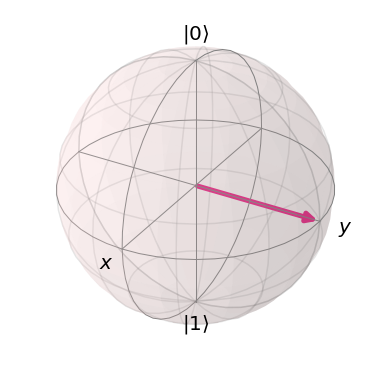

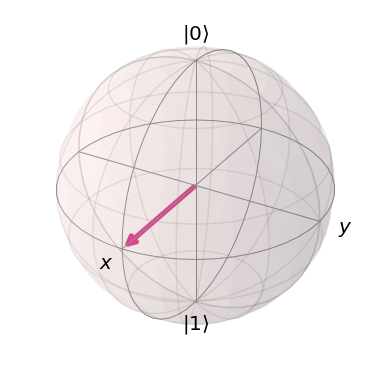

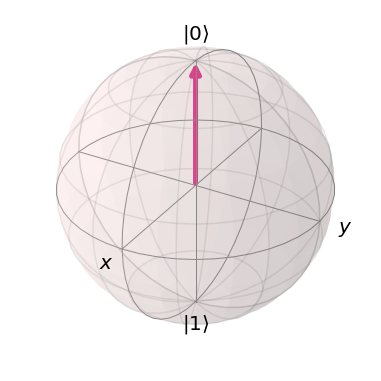

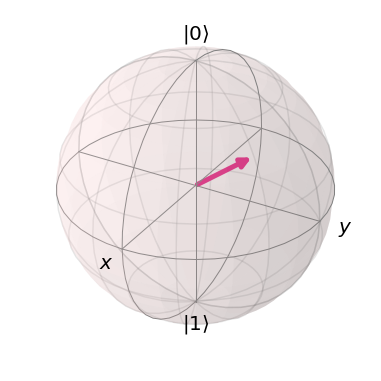

In [16]:
# Bloch
from qiskit.tools.visualization import plot_histogram, plot_state, plot_bloch_vector
plot_bloch_vector([0,1,0])
plot_bloch_vector([1,0,0])
plot_bloch_vector([0,0,1])
plot_bloch_vector([1,1,1])

# Die unstruckturierte Suche in einer Datenbank mit dem Grover-Algorithmus

Der Grover-Algorithmus wurde von Lov Grover im Jahre 1994 veröffentlicht und ist ein Quantenalgorithmus zur Suche in einer unsortierten Datenbank mit $N$ Einträgen. Dazu benötigt er lediglich $O(\sqrt N)$ Schritte. Im vergleich zum klassichen Computer, der schnellstmöglich nur linear Suchen kann und somit $O(N)$ Schritte benötigt, liefert der Grover-Algorithmus eine quadratische Beschleunigung, was für grosse $N$ beträchtlich ist.

Wie die meisten Quantenalgorithmen ist auch der Grover-Algorithmus ein probabilistischer Algorithmus, dass heisst, er gibt die korrekte Antwort mit hoher Wahrscheinlichkeit, wobei die Wahrscheinlichkeit einer fehlerhaften Antwort durch einfache Wiederholung des Algorithmus verkleinert werden kann.

Der Grover-Algorithmus ermöglicht __nicht__ die __direkte Suche__ in unsortierten Datenbanken, sondern ist ein Teilschritt einer vierstüfigen Schrittabfolge:

__1. Initialisierung der Register:__ Daten codieren mit $|0\rangle^{\bigotimes n}$.

__2. Anwedung des Hadamard-Gatters:__ $$|\psi\rangle = H^{\bigotimes n}*|0\rangle^{\bigotimes n} = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} |x\rangle$$

__3. Iteration über $G:$~ $O(\sqrt(N))$:__ 
- __3.1 Anwedung des Orakels $U_f$:__ Markiert gesuchtes Element in der Liste.
- __3.2 Anwedung der Hadamard Tranformation $H^{\bigotimes n}$.__
- __3.3 Anwegund des Grover-Diffusions-Operator $D = -1+2*|0\rangle \langle0|$:__ Berechnet den Durchschnitt aller Zustände und spiegelt sie anschliessend am Durchschnitt in Richtung der X-Achse.
- __3.4 Anwedung der Hadamard Tranformation $H^{\bigotimes n}$.__

$$G = (H^{\bigotimes n}*D*H^{\bigotimes n})*U_f$$
$$ = (-(H^{\bigotimes n}*1*(H^{\bigotimes n} + 2*(H^{\bigotimes n}*|0\rangle \langle0|*(H^{\bigotimes n})*U_f$$
$$ = (-1+2*|\psi\rangle \langle\psi|)*U_f$$
$$ = (2*|\psi\rangle \langle\psi|-1)*U_f$$

__4. Messung der Qbits__: Daten decodieren indem Ergebnis entquantisiert und ausgelesen wird.

<p align="center">
  <img src="src_picture\overview.png" alt="drawing" width="700"/>
</p>

## 1. Schritt: Initialisierung der Register
<img src="src_picture\search.png" alt="drawing"  width="800"/>
Der Ausgangspunkt: wir haben keine Ahnung, wo das gesuchte Element $w$ ist. Daher ist jede Schätzung seiner Position so gut wie jede andere, ergo muss auch jedes Element mit einer gleichen Wahrscheinlichkeit auftreten.




## 2. Schritt: Anwendung des Hadamard-Gatters
Ein typischer nächster Schritt in einem Quantenalgorithmus, einschließlich des Grover-Algorithmus, besteht darin, allen möglichen Zustände eine gleiche Wahrscheinlichkeit zu zuordnen. 
Per Hadamard-Gate $H$ wird jedes Element $|x\rangle$ der Liste mit einer Superposition $|s\rangle$ gleichgesetzt. Dabei sind die Amplituden und unmittelbar auch die Wahrscheinlichkeit der verschiedenen Zustände/Superpositionen $|s\rangle$ gleich:
$$|s⟩=\frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}|x\rangle$$

__Das Quadrat der Amplitude eines Zustands $|s\rangle$ ist die Wahrscheinlichkeit, diesen Zustand $|s⟩$ zu beobachten.__

Nehmen wir als Beispiel ein $n$-Qubit-System mit $n=2$. Das Systems hat somit $n^2=N=4$-dimensinalen Zustandsraum ($00_b, 01_b, 10_b$ und $11_b$), oder anderst ausgedrückt eine Datenbank mit vier Einträgen, welche alle die gleiche Wahrscheinlichkeit besitzen, nämlich $\frac{1}{4}$. Die zweite Wurzel der Warscheinlichkeit ergbit die Amplitudenstärke $\frac{1}{2}$. Gesucht ist $w=10_b=2_d$. Ziel ist es die Wahrscheinlichkeit des markierten Elements gegen $1$ bzw. geometrisch betrachtet den gesuchten Zustand $|\psi\rangle$ möglichst senkrecht nach $|w\rangle$ zu transformieren.

<img src="src_picture\Schritt0-1.png" alt="drawing" width="550" /> $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$<img src="src_picture\Schritt0-2.png" alt="drawing" width="400"/>

Wenn wir nun an dieser Stelle in der Standardbasis $|x\rangle$ messen würden, würde diese Superposition gemäß dem fünften Quantengesetz{LINK} zu einem der Basiszustände mit der gleichen Wahrscheinlichkeit von $\frac{1}{N} = \frac{1}{2^n}$ zusammenbrechen. Unsere Chancen, den richtigen Wert $w$ zu schätzen, wären daher $1$ zu $2^n$, sprich wir müssten im Durchschnitt $N = 2^n$ mal raten um das gesuchte Element zu finden, was schlechter als die klassiche Suche wäre.

## 3. Schritt: Iterationen von unitären Operationen
### 3.1 Anwedung des Orakels
Nun kommt die Magic ins Spiel: das Orakel. Das Orakel kann als Funktion abstrahiert werden, welches das gesuchte Element $w$ markiert, indem es die Amplitude von $w$ an der X-Achse spiegelt, was bedeutet, dass die Amplitude von $w$ nun negativ ist. Wenn also $x=w$ dann wird $f(x) = f(x)^{-1}$ und für alle anderen Wert wird $f(x) = f(x)$ ausgeführt. Da jedoch der Betrag der Wahrscheinlichkeit der Zustände unverändert bleiben, können wir die Lösung so nicht auslesen. Der Grover-Diffusions-Operator (3.3) wird dieses Problem lösen.


#### Disclaimer
Vorneweg möchte ich zunächst die Relation zwischen Funktion und Matrix erläutern. Dies finde ich insbesondere wichtig, da wir uns nur noch mit Matrizen rumschlagen, angefangen bei den Cbits und Qbits, über das Orakel hinweg bis hin zum Grover Algorithmus.

__Jede lineare Funktion $f(x)$ kann durch eine Matrix $M$ dargestellt werden.__ 

Es gilt $f(x)=M$, wenn für $f(x)$ = linear.

Wir können also z. B. $f(x)=2*x$ als $ \left(\begin{array}{c} 2\end{array}\right)$ schreiben.

#### Deutsch-Jozsa-Algorithmus
Der Deutsch-Algorithmus bestimmt ob eine Funktion $f(x)$ balanciert oder konstant ist. Dabei wird die Inputmenge $\{0,1\}$ auf die Outputmenge $\{0,1\}$ abgebildet.
Es gibt nur folgende vier mögliche Funktionen:

$$x = 0 \to f(x) = 0 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, x = 0 \searrow f(x) = 0$$
$$x = 1 \to f(x) = 1 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, x = 1 \nearrow f(x) = 1$$

$$x = 0 \to f(x) = 0 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, x = 0 \searrow f(x) = 0$$
$$x = 1 \nearrow f(x) = 1 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, x = 1 \to f(x) = 1$$

Eine Funktion gilt als balanciert, wenn $f(0) \neq f(1)$ und gilt als konstant, wenn $f(0) = f(1)$.

Um nun eine Funktion $f(x)$ die Eigenschaft balanciert oder konstant zuzuweisen muss ein klassischer Computer $f(x)$ genau zweimal auswerten:

$$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \nearrow \, f(0)=0,\,\,f(1)=0:\,\,konstant\,\,\,$$
$$ \nearrow \, f(0)=0 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, $$
$$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \searrow \, f(0)=0,\,\,f(1)=1:\,\,balanciert$$
$$\bigodot \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$$
$$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \nearrow \, f(0)=1,\,\,f(1)=0:\,\,balanciert$$
$$ \searrow \, f(0)=1 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$$
$$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \searrow \, f(0)=1,\,\,f(1)=1:\,\,kosntant\,\,\,$$

$$\,\,\,\,\,\,\,\,\,Auswertung_1 \,\,\,\,\,\,\,\,\,\,\,\,\,\,Auswertung_2\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$$

Nun stellt sich die entscheidende Frage: __Kann das ein Quantencomputer besser?__ Im Jahre 1992 beantworteten diese Frage David Deutsch and Richard Jozsa mit einem klaren __Ja__. Mit diesem Algorithmus legten sie den Grundstein für den Grover-Algorithmus.

Wir wissen, dass alle Quantengatter, die auf Quantenzuständen wirken, durch unitäre Matrizen dargestellt werden. Es stellt sich nun die Frage: Kann man die Funktion $f(x)$ als gültige Operation ausdrücken?

Um das Problem zu veranschaulichen, analysieren wir eine der oben dargestellten Funktionen:

$$x = 0 \searrow f(x) = 0$$
$$x = 1 \to f(x) = 1$$

Die Inpute diese einfache Funktion initialisiert werden mit

$$|0\rangle = \left(\begin{array}{c} 1\\0 \end{array}\right)$$

$$|1\rangle = \left(\begin{array}{c} 0\\1 \end{array}\right)$$

woraus wir die Matrix $M$ bilden können:

$$M = \left(\begin{array}{c} 0 & 0\\1 & 1 \end{array}\right)$$

Somit ergbit sich für

$$f(|0\rangle) = \left(\begin{array}{c} 0 & 0\\1 & 1 \end{array}\right)* \left(\begin{array}{c} 1\\0 \end{array}\right) = \left(\begin{array}{c} 0\\1 \end{array}\right)$$
und
$$f(|1\rangle) = \left(\begin{array}{c} 0 & 0\\1 & 1 \end{array}\right)* \left(\begin{array}{c} 0\\1 \end{array}\right) = \left(\begin{array}{c} 0\\1 \end{array}\right)$$

Diese Matrix $M$ ist jedoch kein gültiger Quantengatter. 

Um nun eine unitäre Matrix $U_f$ zu konstruieren brauchen wir den cNOT-Operator (1.17) als Unterstützung:

<img src="src_picture\U-cNOT.png" alt="drawing" width="240" />

Das Qbit $|x\rangle$ ist das Inputbit, an dem wir die Funktion auswerten wollen und $|y\rangle$ ist das Control-Bit. Es kann nun bewiesen werden, dass die Matrix $U_f$ unitär ist, indem sie einfach zwei mal hintereinander ausgeführt wird:

<img src="src_picture\circuit_qf_reversible.png" alt="drawing" width="340" />

Der Zustand $|y\rangle$ wird zuerst zu $|x,y\bigoplus f(x)\rangle$ und nach dem zweiten Multiplikation mit $U_f$ zu

$|x,(y\bigoplus f(x))\bigoplus f(x)\rangle = |x,y\bigoplus (f(x)\bigoplus f(x))\rangle = |x,y\bigoplus 0 = |x,y\rangle$

und somit ist $U_f$ unitär. Wenn nun $|y\rangle = |0\rangle$ gesetzt wird, dann erhält man

$|x,y\bigoplus f(x)\rangle = |x,0\bigoplus f(x)\rangle = |x,f(x)\rangle$

Somit kann der gültige Quantengatter $U_f$ unsere Funktion $f(x)$ vollständig auswerten. Mit diesem Trick können wir jede beliebige Funktion mit $f:\{0,1\}^n\to\{0,1\}$ abbilden!

#### Konstruktion des Orakels $U_f$
Bei Quantenalgorithmen wird in der Regel davon ausgegangen, dass das Orakel $U_f$ bereits konstruiert ist und man betrachtet es als eine Blackbox. Der Bau eines Orakels kann aufwändig sein, jedoch 

Ein Vergleich: 


### 3.2 Anwedung der Hadamard Tranformation

### 3.3 Anwedung des Grover-Diffusions-Operator
Nun kommt jedoch die Amplitudenmanipulation ins Spiel. Durch gezielte unitäre Operationen verstärkt sich die Amplitude des gesuchten Elementes $w$ welches im Beispiel den Wert $10$ hat und somit auch seine Wahrscheinlichkeit signifikant. Zugleich sinken die Wahrscheinlichkeiten der anderen Elementen ?????da die Summe aller Wahrscheinlichkeiten immer noch gleich 1 sein müssen?????

Die einzigen zwei Zustände, die wir berücksichtigen müssen, sind der Gewinner $|w⟩$ und die einheitliche Superposition $|s⟩$. Diese zwei Vektoren überspannen eine zweidimensionale Ebene im Vektorraum CN. Sie sind nicht ganz senkrecht, weil | w⟩ auch in der Superposition mit der Amplitude N-1/2 auftritt. Wir können jedoch einen zusätzlichen Zustand | s'⟩ einführen, der in der Spanne dieser beiden Vektoren liegt, der senkrecht zu $|w⟩$ ist und aus $|s⟩$ durch Entfernen von $|w⟩$ und Neuskalierung erhalten wird.

### 3.4 Anwedung der Hadamard Tranformation





## Messung der Qbits


## Die Unstrukturierte Suche
Angenommen, Sie erhalten eine Liste von $N$ Elementen. Unter diesen Elementen befindet sich das gesuchte Element $w$. Stellen Sie sich jedes Element in der Liste als eine Box mit einer bestimmten Farbe vor. Angenommen, alle Einträge in der Liste sind grau, mit Ausnahme des Gewinners $w$.
![unstrProblem](picture_source\unstrukturiertesProblem.png)
Um die rote Box - den markierten Gegenstand - mit Hilfe der klassischen Berechnung zu finden, müsste man im Durchschnitt $N / 2$ dieser Kästchen und im schlimmsten Fall alle $N$ von ihnen überprüfen. 

Auf einem Quantencomputer können wir jedoch den markierten Gegenstand in ungefähr $√N$ Schritten mit Grovers Amplitudenverstärkungstrick finden. Es wurde bewiesen (noch bevor Grovers Algorithmus entdeckt wurde!), dass eine quadratische Beschleunigung die maximal mögliche Beschleunigung ist, auf das wir hoffen können [Bennett, 1997]. Darüber hinaus verwendet der Algorithmus nicht die interne Struktur der Liste, wodurch sie generisch wird. Deshalb liefert es für viele klassische Probleme sofort eine quadratische Quantenbeschleunigung.

## Das Orakel
Wie bekomme ich die Liste der Artikel in meinen Quantencomputer? Ein üblicher Weg, eine Liste zu suchen, ist eine Funktion $f$, die $f (x) = 0$ für alle nicht markierten Elemente $x$ und $f (w) = 1$ für den Gewinner zurückgibt. Um einen Quantencomputer für dieses Problem zu verwenden, müssen wir die Elemente in Superposition für diese Funktion bereitstellen, sodass wir die Funktion in eine unitäre Matrix namens Orakel codieren. Zuerst wählen wir eine binäre Kodierung der Elemente $x$, $w ∈ {0,1} n$, so dass $N = 2^n$; jetzt können wir es in Qubits auf einem Quantencomputer darstellen. Dann definieren wir die Orakelmatrix $Uf$, um auf jeden der einfachen Standardbasiszustände zu wirken $|x⟩$ durch
$$Uf | x⟩ = (- 1) f (x) | x⟩.$$
Wenn nun $x$ nicht markierter ist, dann führt das Orakel nichts auf $x$ aus. Wenn wir das Orakel jedoch auf den Basiszustand anwenden $|w⟩$, es bildet $Uf | ab w⟩ = - | w⟩$. Geometrisch ist diese unitäre Matrix eine Reflexion des Ursprungs für das markierte Element in $N = 2n$-dimensionalem Vektorraum.

## Vorgehensweise
1. Daten quantisieren/Daten in Vektoren codieren/Hadamard Gate: Schritt 0
2. Operationen ausführen bis eine gewisse Warscheinlichkeit erreicht wurde: sqrt(N) wiederholen. ACHTUNG: Grenze setzen
3. Daten dequantisieren/Daten messen und auswerten/Daten decodieren
![schr](picture_source\Schaltung.png)

### Schritt 0: Bringe jeden Zustand x in Superposition s per Hadamard-Gate H
Wie funktioniert nun der Algorithmus? Der Ausgangspunkt: wir haben keine Ahnung, wo das gesuchte Element $w$ ist. Daher ist jede Schätzung seiner Position so gut wie jede andere, ergo muss auch jedes Element mit einer gleichen Wahrscheinlichkeit auftreten.
Ein typischer erster Schritt in einem Quantenalgorithmus, einschließlich des Grover-Algorithmus, besteht darin, allen möglichen Zustände eine gleiche Wahrscheinlichkeit zu zuordnen, indem man das sogenannte Hadamard-Gate $H$ auf das System und somit alle Elemente $|x⟩$ anwendet. Unter Gate kann man sich eine einfache Matrixmultiplikation vorstellen. Somit wird jedes Element $|x⟩$ mit einer Superposition $|s⟩$ gleichgesetzt. Dabei sind die Amplituden und unmittelbar auch die Wahrscheinlichkeit der verschiedenen Zustände/Superpositionen $|s⟩$ gleich:
$$|s⟩=\frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}|x⟩$$
Das Quadrat der Amplitude eines Zustands $|s⟩$ ist die Wahrscheinlichkeit, diesen Zustand $|s⟩$ zu beobachten.

Nehmen wir mit $n=2$ ein 2-Qubit-System als Beispiel. Das Systems hat mit $n^2=N=4$ __vier__ mögliche Zustände 00, 01, 10 und 11, welche alle die gleiche Wahrscheinlichkeit besitzen, nämlich $\frac{1}{4}$. Die zweite Wurzel der Warscheinlichkeit ergbit die Amplitudenstärke $\frac{1}{2}$. Gesucht ist w=10=2
![schr](picture_source\Schritt0-1.png)

Wenn wir nun an dieser Stelle in der Standardbasis ${|x⟩}$ messen würden, würde diese Superposition gemäß dem fünften Quantengesetz{LINK} zu einem der Basiszustände mit der gleichen Wahrscheinlichkeit von $\frac{1}{N} = \frac{1}{2^n}$ zusammenbrechen. Unsere Chancen, den richtigen Wert w zu schätzen, sind daher $1$ zu $2^n$, sprich wir müssten im Durchschnitt $N = 2^n$ mal versuchen um das gesuchte Element zu finden, was schlechter als die klassiche Suche wäre.
Nun kommt jedoch die Amplitudenmanipulation ins Spiel. Durch gezielte unitäre Operationen verstärkt sich die Amplitude des gesuchten Elementes $w$ welches im Beispiel den Wert $10$ hat und somit auch seine Wahrscheinlichkeit signifikant. Zugleich sinken die Wahrscheinlichkeiten der anderen Elementen ?????da die Summe aller Wahrscheinlichkeiten immer noch gleich 1 sein müssen?????

Die einzigen zwei Zustände, die wir berücksichtigen müssen, sind der Gewinner $|w⟩$ und die einheitliche Superposition $|s⟩$. Diese zwei Vektoren überspannen eine zweidimensionale Ebene im Vektorraum CN. Sie sind nicht ganz senkrecht, weil | w⟩ auch in der Superposition mit der Amplitude N-1/2 auftritt. Wir können jedoch einen zusätzlichen Zustand | s'⟩ einführen, der in der Spanne dieser beiden Vektoren liegt, der senkrecht zu $|w⟩$ ist und aus $|s⟩$ durch Entfernen von $|w⟩$ und Neuskalierung erhalten wird.

![schr](picture_source\Schritt0-2.png)

## Entwicklungsumgebungen
Ziel dieses Kapitel ist es die Theorie der Quanteninformatik in die Praxis umzusetzen und so Aufgaben die bislang sehr aufwändig sind zum berechnen in effizienterer Zeit zu erledigen. Dabei gibt es bereits eine Auswahl an Firmen die nicht nur eine Entwicklungsumgebung zur Simulation von Quantencomputer, sondern auch echte Quantencomputer bereitstellt, um den eigenen Code darauf ausführen zu lassen. Ausprobiert habe ich Qiskit von IBM und Cirq von Google.

## Qiskit - Quantum Information Science Toolkit
[Qiskit](https://qiskit.org/) ist ein Open Source Quantencomputing Framework von IBM mit dem Ziel, unterschiedlichen Anwendergruppen den Zugang zur Programmierung zu öffnen: Quantenforscher und andere Wissenschaftler, Lehrer, Entwickler und allgemein Technologieinteressierte. Unsere Vision für Qiskit besteht aus vier fundamentalen Elementen: Terra (die Code Basis, um Quantenprogramme auf dem Level von Schaltungen und Pulsen zu verfassen), Aqua (um Algorithmen und Applikationen aufzubauen), Ignis (um Rauschen und Fehler zu behandeln) und Aer (um die Entwicklung per Simulatoren, Emulatoren und Debuggern zu beschleunigen).

### Terra-Aqua-Air Setup
Als erstes muss das Fundament [Terra](https://github.com/Qiskit/qiskit-terra) installiert werden. Es erlaubt dem Benutzer, Quantenschaltungen einfach zu schreiben, und kümmert sich um die Einschränkungen der realen Hardware. Um den Code nicht bloss auf Simulationen laufen zu lassen, wird ein API-Token benötigt. Die Anleitungen inklusive Tutorials sind unter GitHub sehr gut dokumentiert.
Anschliessend kann [Aqua](https://github.com/Qiskit/aqua) installiert werden.


### Erste Ausführung auf einem Quantencomputer: Der Bell-Zustand
Um mit der Syntax vertraut zu werden, erstellen wir einen simplen Bell-Zustand. Eine Übersicht die Basic-Befehle gibt es unter [Qiskit-Tutorial](https://github.com/Qiskit/qiskit-tutorial). Qiskit hat einige gute Tutorials dabei.

Den [Bell-Zustand]() haben wir ja theoretisch bereits kennengelernt. Wir wollen nun prüfen, ob die Qbits auch in der Praxis verschränkt sind und sich dementsprechend verhalten. Zuerst werden wir den Code auf der Aer-Simulation und danach auf einem echten Quantencomputer von IBM laufen lassen. 

Für den Bell-Zustand benötigen wir nur folgende Elemente:
- QuantumRegister: Hier werden unsere Qbits platziert
- ClassicalRegister: Hier werden unsere Cbits platziert
- QuantumCircuit: Wir mappen die Qbits auf die Cbits, indem wir eine Messung durchführen. In diesem Moment verändern wir die Wirklichkeit und die Elektronen müssen sich "entscheiden", was uns dann das Ergebnis als WKS-Verteilung ausgibt.
- Ein Hadamard-Gate
- Ein cNOT-Gate

Wir setzen q0 in Superposition per H-Gate. Danach wählen wir per cNOT-Gate q0 als Statebit und q1 als Targetbit.
Um einen Circuit mit zwei Qbits zur erzeugen und auf einem Simulator, der in Qiskit enthalten ist, auszuführen, reicht folgender Code:

#### Bell-Zustand mit Aer-Backend (Simulation)

Aer backends:  [<QasmSimulatorPy('qasm_simulator_py') from Aer()>, <StatevectorSimulatorPy('statevector_simulator_py') from Aer()>, <UnitarySimulator('unitary_simulator') from Aer()>]
First simulation:  COMPLETED
Output:  {'11': 526, '00': 474}
Second simulation:  COMPLETED
Output:  {'00': 489, '11': 511}


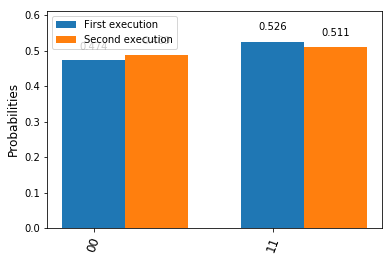

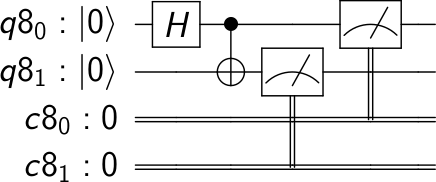

In [13]:
# Import the Qiskit SDK
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import available_backends, execute, Aer
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state

# Create a Quantum Register with 2 qubits.
q = QuantumRegister(2)
# Create a Classical Register with 2 bits.
c = ClassicalRegister(2)
# Create a Quantum Circuit
qc = QuantumCircuit(q, c)

# Add a H gate on qubit 0, putting this qubit in superposition.
qc.h(q[0])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
qc.cx(q[0], q[1])
# Add a Measure gate to see the state.
qc.measure(q, c)

# See a list of available local simulators
print("Aer backends: ", Aer.backends())
backend_sim = Aer.get_backend('qasm_simulator')

# Compile and run the Quantum circuit on a simulator backend
sim_result1 = execute(qc, backend_sim, shots=1000).result()
sim_result2 = execute(qc, backend_sim, shots=1000).result()
counts1 = sim_result1.get_counts(qc)
counts2 = sim_result2.get_counts(qc)

# Show the results as text and plot
print("First simulation: ", sim_result1)
print("Output: ", counts1)
print("Second simulation: ", sim_result2)
print("Output: ", counts2)
legend = ['First execution', 'Second execution']
plot_histogram([counts1,counts2], legend=legend)
circuit_drawer(qc)

Dieser Output sagt uns, das unsere 1000 Shots ziemlich gleichverteilt sind. Sprich wenn q0 = 0 dann ist zeitgleich q1 = 0 und wenn q0 = 1 dann q1 = 1.

Nun wollen wir aber endlich unseren Code des Bell-Zustands auf einem echten Quantencomputer compilieren:

#### Bell-Zustand mit IBMQ-Backend (Quantencomputer)

Remote backends:  [<IBMQBackend('ibmqx4') from IBMQ()>, <IBMQBackend('ibmq_16_melbourne') from IBMQ()>, <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]
Running on current least busy device:  ibmqx4
First experiment:  COMPLETED
Output:  {'00': 472, '01': 81, '10': 60, '11': 411}
Second experiment:  COMPLETED
Output:  {'00': 448, '01': 62, '10': 61, '11': 453}


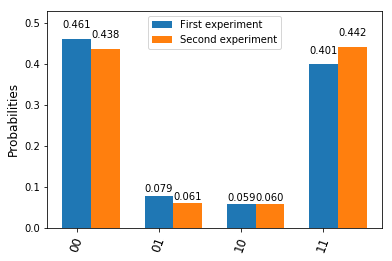

In [16]:
# Import the Qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QISKitError
from qiskit import execute, IBMQ, Aer
from qiskit.backends.ibmq import least_busy
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state

# Authenticate for access to remote backends
try:
    import Qconfig
    IBMQ.load_accounts()
except:
    print("""WARNING: There's no connection with the API for remote backends.
             Have you initialized a file with your personal token?
             For now, there's only access to local simulator backends...""")

try:
    # Create a Quantum Register with 2 qubits.
    q = QuantumRegister(2)
    # Create a Classical Register with 2 bits.
    c = ClassicalRegister(2)
    # Create a Quantum Circuit
    qc = QuantumCircuit(q, c)

    # Add a H gate on qubit 0, putting this qubit in superposition.
    qc.h(q[0])
    # Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
    # the qubits in a Bell state.
    qc.cx(q[0], q[1])
    # Add a Measure gate to see the state.
    qc.measure(q, c)

    # see a list of available remote backends
    ibmq_backends = IBMQ.backends()

    print("Remote backends: ", ibmq_backends)
    # Compile and run the Quantum Program on a real device backend
    try:
        least_busy_device = least_busy(IBMQ.backends(simulator=False))
        print("Running on current least busy device: ", least_busy_device)

        #running the job twice and get counts
        result_exp1 = execute(qc, least_busy_device, shots=1024, max_credits=10).result()
        result_exp2 = execute(qc, least_busy_device, shots=1024, max_credits=10).result()
        counts01 = result_exp1.get_counts(qc)
        counts02 = result_exp2.get_counts(qc)

        # Show the results
        print("First experiment: ", result_exp1)
        print("Output: ", counts01)
        print("Second experiment: ", result_exp2)
        print("Output: ", counts02)
        legend = ['First experiment', 'Second experiment']
        plot_histogram([counts01,counts02], legend=legend)
    except:
        print("All devices are currently unavailable. Try again later.")

except QISKitError as ex:
    print('There was an error in the circuit!. Error = {}'.format(ex))

Auch der Quantencomputer gibt uns für 00 und 11 die grösste WSK aus, jedoch haben auch die anderen Zustände eine WSK. Das ist nachvollziehbar, da zu Beginn der Initialisierung jeder Zustand die gleiche WSK hat, danach beim Versetzen in den Bell-Zustand wachsen die Verschränkten Zustände und die anderen sinken, jedoch niemals auf 0.

In [7]:
qc.h(q[0])

### Schritt 1: Oracle-Magic

### Schritt 2: Reflexion

# Grover mit 2 Qbits Orakel = 11

Running on current least busy device:  ibmqx4
First experiment:  Successful completion
Output:  {'0x3': 348, '0x2': 59, '0x1': 72, '0x0': 21}
Second experiment:  Successful completion
Output:  {'0x3': 356, '0x2': 63, '0x1': 49, '0x0': 32}


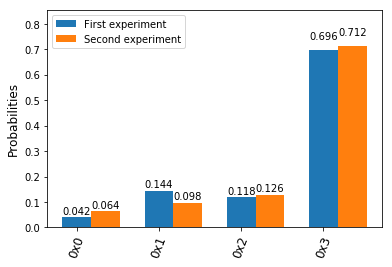

In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QISKitError
from qiskit import available_backends, execute, Aer, backends, IBMQ
from qiskit.backends.ibmq import least_busy
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state
import math

# decide, on which backend you want to run the grover algorithmus
backendIBMQ = True

# define the number of your Qbits
N = 2

try:
    # Create a Quantum-Register with N qubits.
    q = QuantumRegister(N)
    c = ClassicalRegister(N)
    qc = QuantumCircuit(q, c)
    
    # initialize N-Qbits
    qc.h(q[0])
    qc.h(q[1])

    n = 0
    # avarage of ~O(sqrt(N)) repititions
    while n < 1:
        # oracle
        qc.h(q[1]);
        qc.cx(q[0],q[1]);
        qc.h(q[1]);

        # grover difiusion
        qc.h(q[0]);
        qc.h(q[1]);
        qc.h(q[1]);
        qc.cx(q[0],q[1]);
        
        qc.h(q[1]);
        qc.x(q[0]);
        qc.h(q[1]);
        qc.cx(q[0],q[1]);
        
        qc.x(q[0]);
        qc.h(q[1]);
        qc.h(q[0]);
        qc.x(q[1]);
        qc.cx(q[1],q[0]);
        
        qc.h(q[0]);
        qc.x(q[1]);
        qc.h(q[0]);
        qc.h(q[1]);
        
        n = n + 1

    # measure
    qc.measure(q, c)
      
        
except QISKitError as ex:
        print('There was an error in the circuit!. Error = {}'.format(ex))

# run the code on a real quantumcomputer from IBM
if backendIBMQ:
    # Authenticate for access to remote backends
    try:
        import Qconfig
        IBMQ.load_accounts()    
        try:
            # See a list of available local simulators
            least_busy_device = least_busy(IBMQ.backends(simulator=False))
            print("Running on current least busy device: ", least_busy_device)

            #running the job twice and get counts
            result_exp1 = execute(qc, least_busy_device, shots = 500, max_credits = 10).result()
            result_exp2 = execute(qc, least_busy_device, shots = 500, max_credits = 10).result()
            counts01 = result_exp1.get_counts(qc)
            counts02 = result_exp2.get_counts(qc)

            # Show the results
            print("First experiment: ", result_exp1)
            print("Output: ", counts01)
            print("Second experiment: ", result_exp2)
            print("Output: ", counts02)
            legend = ['First experiment', 'Second experiment']
            plot_histogram([counts01,counts02], legend=legend)
            circuit_drawer(qc)
        except:
            print("All devices are currently unavailable. Try again later.")
    except:
        print("""WARNING: There's no connection with the API for remote backends.
                 Have you initialized a file with your personal token?
                 For now, there's only access to local simulator backends...""")
        
# or run the code on your own system with the simulation backend Aer
else:
    # See a list of available local simulators
    print("Aer backends: ", Aer.backends())
    backend_sim = Aer.get_backend('qasm_simulator')

    # Compile and run the Quantum circuit on a simulator backend
    sim_result1 = execute(qc, backend_sim, shots=1000).result()
    sim_result2 = execute(qc, backend_sim, shots=1000).result()
    counts1 = sim_result1.get_counts(qc)
    counts2 = sim_result2.get_counts(qc)

    # Show the results as text and plot
    print("First simulation: ", sim_result1)
    print("Output: ", counts1)
    print("Second simulation: ", sim_result2)
    print("Output: ", counts2)
    legend = ['First execution', 'Second execution']
    plot_histogram([counts1,counts2], legend=legend)
    circuit_drawer(qc)

# Grover mit 4 Qbits Orakel = 10

C:\Users\also\AppData\Local\Continuum\anaconda3\lib\site-packages\qiskit\backends\ibmq\ibmqprovider.py:258: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


Running on current least busy device:  ibmqx4
First experiment:  Successful completion
Output:  {'0x9': 43, '0x8': 42, '0x3': 25, '0x2': 24, '0x1': 45, '0x0': 60, '0x7': 6, '0x6': 4, '0x5': 16, '0x4': 19, '0xC': 64, '0xB': 15, '0xA': 21, '0xF': 28, '0xE': 32, '0xD': 56}
Second experiment:  Successful completion
Output:  {'0x9': 24, '0x8': 36, '0x3': 33, '0x2': 35, '0x1': 31, '0x0': 40, '0x7': 48, '0x6': 63, '0x5': 13, '0x4': 12, '0xC': 6, '0xB': 23, '0xA': 29, '0xF': 38, '0xE': 60, '0xD': 9}


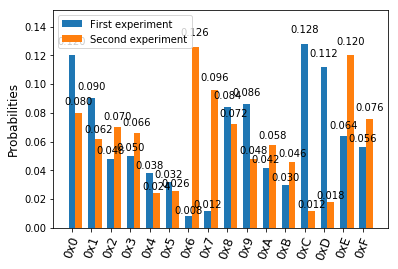

In [12]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import available_backends, execute, Aer, backends
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state
import math

# decide, on which backend you want to run the grover algorithmus
backendIBMQ = True

# define the number n-Qbits
n = 4
N = 2^n
O = math.sqrt(N)
pi = math.pi

try:
    # Create a Quantum-Register with n-Qbits.
    qr = QuantumRegister(n)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr, cr)

    # initialize n-Qbits
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])
    qc.h(qr[3])

    i = 1
    # avarage of O(sqrt(N)) repititions
    while i < O:  
        # Create oracle for 0010
        qc.x(qr[0])
        qc.x(qr[2])
        qc.x(qr[3])
        qc.cu1(pi/4, qr[0], qr[3])
        qc.cx(qr[0], qr[1])
        qc.cu1(-pi/4, qr[1], qr[3])
        qc.cx(qr[0], qr[1])
        qc.cu1(pi/4, qr[1], qr[3])
        qc.cx(qr[1], qr[2])
        qc.cu1(-pi/4, qr[2], qr[3])
        qc.cx(qr[0], qr[2])
        qc.cu1(pi/4, qr[2], qr[3])
        qc.cx(qr[1], qr[2])
        qc.cu1(-pi/4, qr[2], qr[3])
        qc.cx(qr[0], qr[2])
        qc.cu1(pi/4, qr[2], qr[3])
        qc.x(qr[0])
        qc.x(qr[2])
        qc.x(qr[3])

        # Amplification
        qc.h(qr[0])
        qc.h(qr[1])
        qc.h(qr[2])
        qc.h(qr[3])
        qc.x(qr[0])
        qc.x(qr[1])
        qc.x(qr[2])
        qc.x(qr[3])
        ######## cccZ #########
        qc.cu1(pi/4, qr[0], qr[3])
        qc.cx(qr[0], qr[1])
        qc.cu1(-pi/4, qr[1], qr[3])
        qc.cx(qr[0], qr[1])
        qc.cu1(pi/4, qr[1], qr[3])
        qc.cx(qr[1], qr[2])
        qc.cu1(-pi/4, qr[2], qr[3])
        qc.cx(qr[0], qr[2])
        qc.cu1(pi/4, qr[2], qr[3])
        qc.cx(qr[1], qr[2])
        qc.cu1(-pi/4, qr[2], qr[3])
        qc.cx(qr[0], qr[2])
        qc.cu1(pi/4, qr[2], qr[3])
        ####### end cccZ #######
        qc.x(qr[0])
        qc.x(qr[1])
        qc.x(qr[2])
        qc.x(qr[3])
        qc.h(qr[0])
        qc.h(qr[1])
        qc.h(qr[2])
        qc.h(qr[3])

        i += 1
        
    # Measure: take state from Qbit to Cbit
    qc.barrier(qr)
    qc.measure(qr[0], cr[0])
    qc.measure(qr[1], cr[1])
    qc.measure(qr[2], cr[2])
    qc.measure(qr[3], cr[3])
    
except QISKitError as ex:
        print('There was an error in the circuit!. Error = {}'.format(ex))

# run the code on a real quantumcomputer from IBM
if backendIBMQ:
    # Authenticate for access to remote backends
    try:
        import Qconfig
        IBMQ.load_accounts()    
        try:
            # See a list of available local simulators
            least_busy_device = least_busy(IBMQ.backends(simulator=False))
            print("Running on current least busy device: ", least_busy_device)

            #running the job twice and get counts
            result_exp1 = execute(qc, least_busy_device, shots = 500, max_credits = 10).result()
            result_exp2 = execute(qc, least_busy_device, shots = 500, max_credits = 10).result()
            counts01 = result_exp1.get_counts(qc)
            counts02 = result_exp2.get_counts(qc)

            # Show the results
            print("First experiment: ", result_exp1)
            print("Output: ", counts01)
            print("Second experiment: ", result_exp2)
            print("Output: ", counts02)
            legend = ['First experiment', 'Second experiment']
            plot_histogram([counts01,counts02], legend=legend)
            circuit_drawer(qc)
        except:
            print("All devices are currently unavailable. Try again later.")
    except:
        print("""WARNING: There's no connection with the API for remote backends.
                 Have you initialized a file with your personal token?
                 For now, there's only access to local simulator backends...""")
        
# or run the code on your own system with the simulation backend Aer
else:
    # See a list of available local simulators
    print("Aer backends: ", Aer.backends())
    backend_sim = Aer.get_backend('qasm_simulator')

    # Compile and run the Quantum circuit on a simulator backend
    sim_result1 = execute(qc, backend_sim, shots=1000).result()
    sim_result2 = execute(qc, backend_sim, shots=1000).result()
    counts1 = sim_result1.get_counts(qc)
    counts2 = sim_result2.get_counts(qc)

    # Show the results as text and plot
    print("First simulation: ", sim_result1)
    print("Output: ", counts1)
    print("Second simulation: ", sim_result2)
    print("Output: ", counts2)
    legend = ['First execution', 'Second execution']
    plot_histogram([counts1,counts2], legend=legend)
    circuit_drawer(qc)

# Grover mit 16 Qbits

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import available_backends, execute, Aer, backends
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state
import math

# decide, on which backend you want to run the grover algorithmus
backendIBMQ = False

# define the number of your Qbits
N=4
pi = math.pi

try:
    # Create a Quantum-Register with N qubits.
    qr = QuantumRegister(N)
    cr = ClassicalRegister(N)
    qc = QuantumCircuit(qr, cr)

    # initialize N-Qbits
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])
    qc.h(qr[3])
    qc.h(qr[4])
    qc.h(qr[5])
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])
    qc.h(qr[9])
    qc.h(qr[10])
    qc.h(qr[11])
    qc.h(qr[12])
    qc.h(qr[13])
    qc.h(qr[14])
    qc.h(qr[15])

    n = 0
    # avarage of O(sqrt(N)) repititions
    while n < 1:  
        # Create oracle for 0000'0000'0000'0010
        qc.x(qr[0])
        qc.x(qr[2])
        qc.x(qr[3])
        qc.cu1(pi/4, qr[0], qr[3])
        qc.cx(qr[0], qr[1])
        qc.cu1(-pi/4, qr[1], qr[3])
        qc.cx(qr[0], qr[1])
        qc.cu1(pi/4, qr[1], qr[3])
        qc.cx(qr[1], qr[2])
        qc.cu1(-pi/4, qr[2], qr[3])
        qc.cx(qr[0], qr[2])
        qc.cu1(pi/4, qr[2], qr[3])
        qc.cx(qr[1], qr[2])
        qc.cu1(-pi/4, qr[2], qr[3])
        qc.cx(qr[0], qr[2])
        qc.cu1(pi/4, qr[2], qr[3])
        qc.x(qr[0])
        qc.x(qr[2])
        qc.x(qr[3])

        # Amplification
        qc.h(qr[0])
        qc.h(qr[1])
        qc.h(qr[2])
        qc.h(qr[3])
        qc.x(qr[0])
        qc.x(qr[1])
        qc.x(qr[2])
        qc.x(qr[3])
        ######## cccZ #########
        qc.cu1(pi/4, qr[0], qr[3])
        qc.cx(qr[0], qr[1])
        qc.cu1(-pi/4, qr[1], qr[3])
        qc.cx(qr[0], qr[1])
        qc.cu1(pi/4, qr[1], qr[3])
        qc.cx(qr[1], qr[2])
        qc.cu1(-pi/4, qr[2], qr[3])
        qc.cx(qr[0], qr[2])
        qc.cu1(pi/4, qr[2], qr[3])
        qc.cx(qr[1], qr[2])
        qc.cu1(-pi/4, qr[2], qr[3])
        qc.cx(qr[0], qr[2])
        qc.cu1(pi/4, qr[2], qr[3])
        ####### end cccZ #######
        qc.x(qr[0])
        qc.x(qr[1])
        qc.x(qr[2])
        qc.x(qr[3])
        qc.h(qr[0])
        qc.h(qr[1])
        qc.h(qr[2])
        qc.h(qr[3])

        # Measure: take state from Qbit to Cbit
        qc.barrier(qr)
        qc.measure(qr[0], cr[0])
        qc.measure(qr[1], cr[1])
        qc.measure(qr[2], cr[2])
        qc.measure(qr[3], cr[3])
        n = n + 1
except QISKitError as ex:
        print('There was an error in the circuit!. Error = {}'.format(ex))

# run the code on a real quantumcomputer from IBM
if backendIBMQ:
    # Authenticate for access to remote backends
    try:
        import Qconfig
        IBMQ.load_accounts()    
        try:
            # See a list of available local simulators
            least_busy_device = least_busy(IBMQ.backends(simulator=False))
            print("Running on current least busy device: ", least_busy_device)

            #running the job twice and get counts
            result_exp1 = execute(qc, least_busy_device, shots = 500, max_credits = 10).result()
            result_exp2 = execute(qc, least_busy_device, shots = 500, max_credits = 10).result()
            counts01 = result_exp1.get_counts(qc)
            counts02 = result_exp2.get_counts(qc)

            # Show the results
            print("First experiment: ", result_exp1)
            print("Output: ", counts01)
            print("Second experiment: ", result_exp2)
            print("Output: ", counts02)
            legend = ['First experiment', 'Second experiment']
            plot_histogram([counts01,counts02], legend=legend)
            circuit_drawer(qc)
        except:
            print("All devices are currently unavailable. Try again later.")
    except:
        print("""WARNING: There's no connection with the API for remote backends.
                 Have you initialized a file with your personal token?
                 For now, there's only access to local simulator backends...""")
        
# or run the code on your own system with the simulation backend Aer
else:
    # See a list of available local simulators
    print("Aer backends: ", Aer.backends())
    backend_sim = Aer.get_backend('qasm_simulator')

    # Compile and run the Quantum circuit on a simulator backend
    sim_result1 = execute(qc, backend_sim, shots=1000).result()
    sim_result2 = execute(qc, backend_sim, shots=1000).result()
    counts1 = sim_result1.get_counts(qc)
    counts2 = sim_result2.get_counts(qc)

    # Show the results as text and plot
    print("First simulation: ", sim_result1)
    print("Output: ", counts1)
    print("Second simulation: ", sim_result2)
    print("Output: ", counts2)
    legend = ['First execution', 'Second execution']
    plot_histogram([counts1,counts2], legend=legend)
    circuit_drawer(qc)